# Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
datapath = '/content/drive/My Drive/BT4222 Project/data'

In [ ]:
import pandas as pd
df_kaggle1 = pd.read_csv(datapath + '/train.csv')
df_kaggle2 = pd.read_csv(datapath + '/tweets.csv')
df_scraped = pd.read_csv(datapath + '/newdata_final.csv')

In [ ]:
print(df_kaggle1.shape)
print(df_kaggle2.shape)
print(df_scraped.shape)

(7613, 5)
(11370, 5)
(7085, 5)


In [ ]:
df = pd.concat([df_kaggle1, df_kaggle2, df_scraped]).reset_index()
df = df.drop('index', axis=1)
print(df.shape)

(26068, 5)


In [ ]:
df['id'] = list(range(1,26069))

In [ ]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,2,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,3,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,4,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,5,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
#check for na value
df.isnull().sum()

id             0
keyword       61
location    8536
text           0
target         0
dtype: int64

# Data Exploration 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


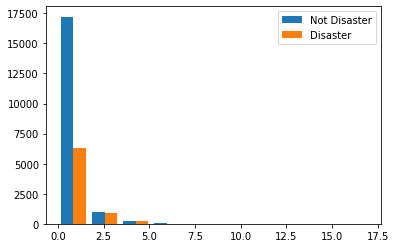

In [ ]:
# hashtag and target group
DISASTER_TWEETS = df['target'] == 1
df['hashtag_count'] = df['text'].apply(lambda x: len([c for c in str(x) if c == '#']))
plt.hist([df.loc[~DISASTER_TWEETS]['hashtag_count'], df.loc[DISASTER_TWEETS]['hashtag_count']], label=['Not Disaster', 'Disaster'])
plt.legend(loc='upper right')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


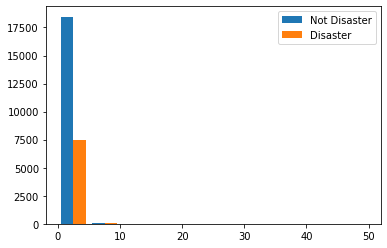

In [ ]:
# mention and target group
df['mention_count'] = df['text'].apply(lambda x: len([c for c in str(x) if c == '@']))
plt.hist([df.loc[~DISASTER_TWEETS]['mention_count'], df.loc[DISASTER_TWEETS]['mention_count']], label=['Not Disaster', 'Disaster'])
plt.legend(loc='upper right')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


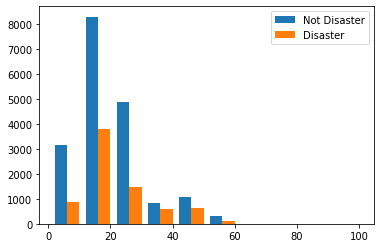

In [ ]:
# word count and target group
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
plt.hist([df.loc[~DISASTER_TWEETS]['word_count'], df.loc[DISASTER_TWEETS]['word_count']], label=['Not Disaster', 'Disaster'])
plt.legend(loc='upper right')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


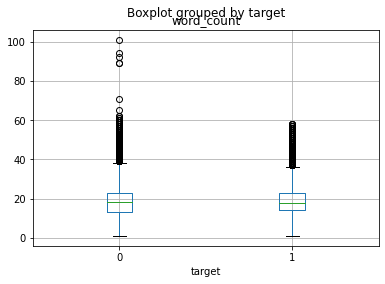

In [ ]:
df.boxplot(column='word_count', by='target')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


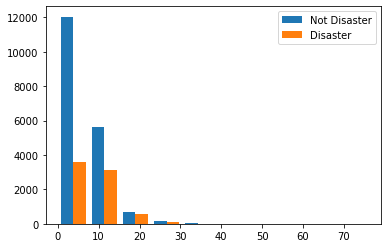

In [ ]:
# puntuation and target group
import string
df['punctuation_count'] = df['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
plt.hist([df.loc[~DISASTER_TWEETS]['punctuation_count'], df.loc[DISASTER_TWEETS]['punctuation_count']], label=['Not Disaster', 'Disaster'])
plt.legend(loc='upper right')
plt.show()

In [ ]:
#keyword and the target group.
df.loc[~DISASTER_TWEETS]['keyword'].value_counts()

fear                   162
deluge                 156
drown                  151
drowning               149
harm                   148
                      ... 
wreckage                23
suicide%20bomber        21
typhoon                 19
burning%20buildings     16
sinkhole                14
Name: keyword, Length: 221, dtype: int64

In [ ]:
df.loc[DISASTER_TWEETS]['keyword'].value_counts()

collision       109
derailment      107
thunderstorm    103
earthquake       92
casualties       88
               ... 
obliteration      5
panicking         5
ruin              5
crush             4
harm              4
Name: keyword, Length: 221, dtype: int64

In [ ]:
#location and the target group.
df.loc[~DISASTER_TWEETS]['location'].value_counts()

United States           130
India                   115
Australia               102
London                  102
USA                      91
                       ... 
Where love lives          1
Belleville, Illinois      1
17 👖🥪💤🐝                   1
Autobot City, Earth       1
The Next Level            1
Name: location, Length: 7413, dtype: int64

In [ ]:
df.loc[DISASTER_TWEETS]['location'].value_counts()

United States                 120
Myanmar                        91
USA                            79
India                          59
UK                             50
                             ... 
Tamil Nadu, India               1
Chicago, Illinois               1
San Pablo City, Calabarzon      1
Quezon City, Philippines        1
Somewhere In The Ocean          1
Name: location, Length: 2829, dtype: int64

In [ ]:
# proportion of target tweets
df['target'].value_counts()

0    18592
1     7476
Name: target, dtype: int64

# Data Cleaning

In [ ]:
# remove new columns created from data exploration
df = pd.concat([df_kaggle1, df_kaggle2, df_scraped]).reset_index()
df = df.drop('index', axis=1)
print(df.shape)
df['id'] = list(range(1,26069))
df.head()

(26068, 5)


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,2,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,3,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,4,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,5,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
#remove duplicates 
df = df.drop_duplicates(['text'])

#remove links
import re

def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)

df['text'] = df['text'].apply(lambda x: remove_URL(x))

#remove punctuation 
import string

def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

df['text'] = df['text'].apply(lambda x: remove_punct(x))

#remove words containing numbers
def remove_wordnum(text):
  text = re.sub('\w*\d\w*', '', text)
  return text

df['text'] = df['text'].apply(lambda x: remove_wordnum(x))

#remove line break
def remove_linebreak(text):
  text = re.sub('\n', '', text)
  return text

df['text'] = df['text'].apply(lambda x: remove_linebreak(x))

#Remove emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

df['text'] = df['text'].apply(lambda x: remove_emoji(x))

#Remove special characters attached to words
def remove_spchar(text): 
    text = re.sub(r"\x89Û_", "", text)
    text = re.sub(r"\x89ÛÒ", "", text)
    text = re.sub(r"\x89ÛÓ", "", text)
    text = re.sub(r"\x89ÛÏWhen", "When", text)
    text = re.sub(r"\x89ÛÏ", "", text)
    text = re.sub(r"China\x89Ûªs", "China's", text)
    text = re.sub(r"let\x89Ûªs", "let's", text)
    text = re.sub(r"\x89Û÷", "", text)
    text = re.sub(r"\x89Ûª", "", text)
    text = re.sub(r"\x89Û\x9d", "", text)
    text = re.sub(r"å_", "", text)
    text = re.sub(r"\x89Û¢", "", text)
    text = re.sub(r"\x89Û¢åÊ", "", text)
    text = re.sub(r"fromåÊwounds", "from wounds", text)
    text = re.sub(r"åÊ", "", text)
    text = re.sub(r"åÈ", "", text)
    text = re.sub(r"JapÌ_n", "Japan", text)    
    text = re.sub(r"Ì©", "e", text)
    text = re.sub(r"å¨", "", text)
    text = re.sub(r"SuruÌ¤", "Suruc", text)
    text = re.sub(r"åÇ", "", text)
    text = re.sub(r"å£3million", "3 million", text)
    text = re.sub(r"åÀ", "", text)
    return text
  
df['text'] = df['text'].apply(lambda x : remove_spchar(x))
    
#expand abbreviations
contractions = { 
    "I'm": "I am",
    "I'm'a": "I am about to",
    "I'm'o": "I am going to",
    "I've": "I have",
    "I'll": "I will",
    "I'll've": "I will have",
    "I'd": "I would",
    "I'd've": "I would have",
    "Whatcha": "What are you",
    "amn't": "am not",
    "ain't": "are not",
    "aren't": "are not",
    "'cause": "because",
    "can't": "can not",
    "can't've": "can not have",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "daren't": "dare not",
    "daresn't": "dare not",
    "dasn't": "dare not",
    "didn't": "did not",
    "didn’t": "did not",
    "don't": "do not",
    "don’t": "do not",
    "doesn't": "does not",
    "e'er": "ever",
    "everyone's": "everyone is",
    "finna": "fixing to",
    "gimme": "give me",
    "gon't": "go not",
    "gonna": "going to",
    "gotta": "got to",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he've": "he have",
    "he's": "he is",
    "he'll": "he will",
    "he'll've": "he will have",
    "he'd": "he would",
    "he'd've": "he would have",
    "here's": "here is",
    "how're": "how are",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how's": "how is",
    "how'll": "how will",
    "isn't": "is not",
    "it's": "it is",
    "'tis": "it is",
    "'twas": "it was",
    "it'll": "it will",
    "it'll've": "it will have",
    "it'd": "it would",
    "it'd've": "it would have",
    "kinda": "kind of",
    "let's": "let us",
    "luv": "love",
    "ma'am": "madam",
    "may've": "may have",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "ne'er": "never",
    "o'": "of",
    "o'clock": "of the clock",
    "ol'": "old",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "o'er": "over",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shalln't": "shall not",
    "shan't've": "shall not have",
    "she's": "she is",
    "she'll": "she will",
    "she'd": "she would",
    "she'd've": "she would have",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "somebody's": "somebody is",
    "someone's": "someone is",
    "something's": "something is",
    "sux": "sucks",
    "that're": "that are",
    "that's": "that is",
    "that'll": "that will",
    "that'd": "that would",
    "that'd've": "that would have",
    "em": "them",
    "there're": "there are",
    "there's": "there is",
    "there'll": "there will",
    "there'd": "there would",
    "there'd've": "there would have",
    "these're": "these are",
    "they're": "they are",
    "they've": "they have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they'd": "they would",
    "they'd've": "they would have",
    "this's": "this is",
    "those're": "those are",
    "to've": "to have",
    "wanna": "want to",
    "wasn't": "was not",
    "we're": "we are",
    "we've": "we have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we'd": "we would",
    "we'd've": "we would have",
    "weren't": "were not",
    "what're": "what are",
    "what'd": "what did",
    "what've": "what have",
    "what's": "what is",
    "what'll": "what will",
    "what'll've": "what will have",
    "when've": "when have",
    "when's": "when is",
    "where're": "where are",
    "where'd": "where did",
    "where've": "where have",
    "where's": "where is",
    "which's": "which is",
    "who're": "who are",
    "who've": "who have",
    "who's": "who is",
    "who'll": "who will",
    "who'll've": "who will have",
    "who'd": "who would",
    "who'd've": "who would have",
    "why're": "why are",
    "why'd": "why did",
    "why've": "why have",
    "why's": "why is",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "you're": "you are",
    "you've": "you have",
    "you'll've": "you shall have",
    "you'll": "you will",
    "you'd": "you would",
    "you'd've": "you would have"
 }

contractions_re = re.compile('(%s)' % '|'.join(contractions.keys()))
def expand_contractions(s, contractions = contractions):
    def replace(match):
        return contractions[match.group(0)]
    return contractions_re.sub(replace, s)

df['text'] = df['text'].apply(expand_contractions)

#Missing keywords → replace with no_keyword, missing locations → replace with no_location
df['keyword'] = df['keyword'].fillna('no_keyword')
df['location'] = df['location'].fillna('no_location')

#Remove non-english parts
import nltk 
nltk.download('words')

def takeCharsUntilNotRoman(w):
    result = []
    for c in w:
        if ord(c) <128 or (ord(c) >= 65313 and ord(c) <= 65339) or (ord(c) >= 65345 and ord(c) <= 65371):
            result.append(c)
        else:
            break
    # Assume a word needs to be at least 2 chars long
    if len(result) > 1:
        return ''.join(result)
    return ''

def removeNonEnglishWordsFunct(x):
    words = set(nltk.corpus.words.words())
    filteredSentence = (takeCharsUntilNotRoman(w) for w in nltk.wordpunct_tokenize(x) \
                                if w.lower() in words or not w.isalpha() or w[0].upper())

    return ' '.join([a for a in filteredSentence if a])

for i in range(df.shape[0]):
    df.text.iloc[i] = removeNonEnglishWordsFunct(df.text.iloc[i])

In [ ]:
# Export
df.to_csv('/content/drive/My Drive/BT4222 Project/data/final_data.csv')